# Insights and Visualizations

_We Rate Dogs dataset post Wrangling Analyisis...By Randy Jackson_

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.  

The dataset we analyzing and visualizing is the output from the wrangling efforts of a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This data is supplemented with additional data via the Twitter API and and image predictions file which is the output of running the images in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs.

In [26]:
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 12 columns):
tweet_id               1696 non-null int64
timestamp              1696 non-null object
text                   1696 non-null object
rating_numerator       1696 non-null int64
rating_denominator     1696 non-null int64
favorite_count         1696 non-null float64
retweet_count          1696 non-null float64
jpg_url                1696 non-null object
predicted_breed        1696 non-null object
confidence_interval    1696 non-null float64
dog_stage              1696 non-null object
dog_name               1696 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 159.1+ KB


In [28]:
grped=pd.DataFrame(df_master.groupby(['dog_stage'])['tweet_id'].count()).reset_index()
sorted=grped.sort_values('tweet_id',ascending=False)


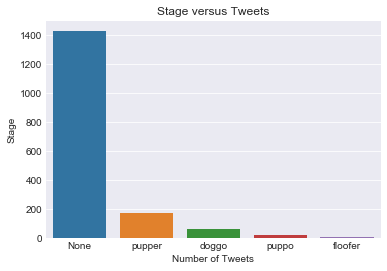

In [29]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
ax= sns.barplot(y="tweet_id", x="dog_stage", data=sorted);
ax.set_xlabel("Number of Tweets")
ax.set_ylabel("Stage")
ax.set_title("Stage versus Tweets");

>This chart shows the distribution of dog stages.  However there is a large proortion of dogs for which the dog stage is not specified, so we'll alter the data set for the chart and run it again to get a better sense of the distribution.  **Note: the work done during the wrangling process to collapse the dog stages into a single column with one observation per row make this chart easy to plot.**



In [30]:
df_tmp=df_master[df_master['dog_stage'] != 'None']
grped=pd.DataFrame(df_tmp.groupby(['dog_stage'])['tweet_id'].count()).reset_index()
sorted=grped.sort_values('tweet_id',ascending=False)


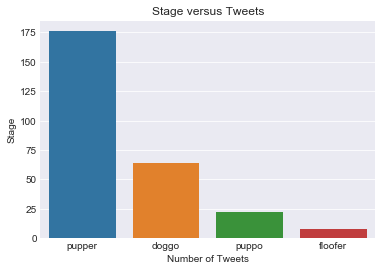

In [31]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
ax= sns.barplot(y="tweet_id", x="dog_stage", data=sorted);
ax.set_xlabel("Number of Tweets")
ax.set_ylabel("Stage")
ax.set_title("Stage versus Tweets");

>This chart better shows the distribution of dog stages.  We see that over twice as many of the rated dogs with stages are puppers.

In [32]:
grped=pd.DataFrame(df_master.groupby(['predicted_breed'])['tweet_id'].count()).reset_index()
sorted=grped.sort_values('tweet_id',ascending=False)
Top25=sorted.iloc[:25]

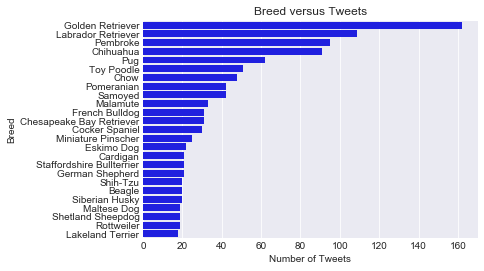

In [33]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(10, 10)
ax= sns.barplot(x="tweet_id", y="predicted_breed", data=Top25, color="b", orient="h");
ax.set_xlabel("Number of Tweets")
ax.set_ylabel("Breed")
ax.set_title("Breed versus Tweets");

>There were too many dog breeds to create a pleasing chart that included them all.  Here used aslice of the data to plot the top 25 breeds that people are rating. **Note: the work done during the wrangling process to clean the dog names and remove non-dog information make this chart more appealing and possible.**


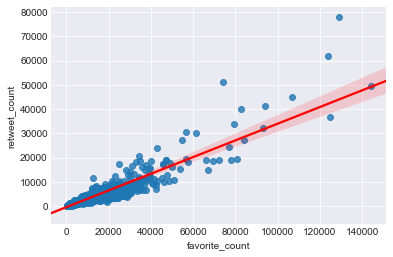

In [34]:
sns.set_style("darkgrid")
x=pd.DataFrame(df_master['favorite_count'])
y=pd.DataFrame(df_master['retweet_count'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='favorite_count', y="retweet_count", data=cdf, line_kws={'color': 'red'})

>Visually, there appears to be a positive correlation between favorite count and re-tweets.  

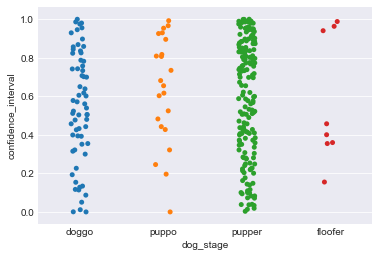

In [35]:
df_tmp=df_master[df_master['dog_stage'] != 'None']

sns.set_style("darkgrid")
x=pd.DataFrame(df_tmp['dog_stage'])
y=pd.DataFrame(df_tmp['confidence_interval'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.stripplot(x='dog_stage', y="confidence_interval", data=cdf, jitter=True)

>This chart was an attempt to see if there were higher confidence intervals of the images associated with a particular stage of dog, while there are more puppers (which we know from above) the confidence intervals appear to be evenly distributed.  **Note: the work done during the wrangling process to collapse confidence interval into single column with one observation per row make this chart easy to plot.**


In [36]:
df_master['rating'] = df_master['rating_numerator'] / df_master['rating_denominator']

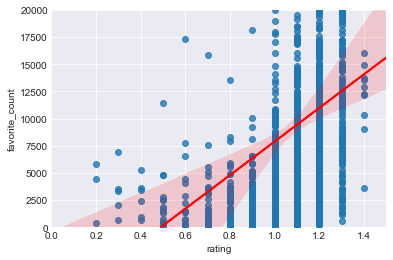

In [37]:
sns.set_style("darkgrid")
x=pd.DataFrame(df_master['rating'])
y=pd.DataFrame(df_master['favorite_count'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='rating', y="favorite_count", data=cdf, line_kws={'color': 'red'})
ax.set_xlim(0,1.5);
ax.set_ylim(0,20000);

>This chart supports my intuition that dogs that have higer ratings get favorited more.

# Conclusion

Given the nature of the rating system used by We Rate Dogs it makes it difficult to put too much credability in the rating based statistcs. This exercise underscores the need for upstream data quality controls in order to have confidence in the analysis results. Extracting data from free form text based input into systems with no input validation is a difficult and error prone task. The charts appear to align with my intuitions about the data.       